# Ignore this part (Manual import)

In [28]:
import numpy as np
# import tensorflow as tf

import scipy
import os
from os import listdir
from scipy.io import loadmat
import pickle
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
# from tensorflow.keras import regularizers
# from tensorflow.keras import activations

In [ ]:
pip install tensorflow

In [ ]:
directory = "/media/mountHDD1/LanxHuyen/SEED_IV/eeg_feature_smooth/1/"
directories = ["/media/mountHDD1/LanxHuyen/SEED_IV/eeg_feature_smooth/{}/".format(i+1) for i in range(3)] 
print(directories)
channel_coords = [['0', '0', 'AF3', 'FP1', 'FPZ', 'FP2', 'AF4', '0', '0'], ['F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8'], ['FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8'], ['T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8'], ['TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8'], ['P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8'], ['0', 'PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', '0'], ['0', '0', 'CB1', 'O1', 'OZ', 'O2', 'CB2', '0', '0']]

channel_list = ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', 'CB1', 'O1', 'OZ', 'O2', 'CB2']
print(len(channel_coords), len(channel_coords[0]))
coord_dict = {}
for n in range(len(channel_list)):
    for i, l in enumerate(channel_coords):
        for j, x in enumerate(l):
            if (channel_list[n] == x):
                coord_dict[n] = (i,j)
print(coord_dict)

In [ ]:
n = 24
perSample = ['de_movingAve', 'de_LDS', 'psd_movingAve', 'psd_LDS']
array = np.zeros(shape=(len(directories),len(os.listdir(directories[0])), n, 4, 8, 9, 5, 64)) # features = 4 datatypes*(8 x 9 eeg channel locs)*5 frequency bands*64 timestamps(zero padded) // trials = (3 sessions) x 15 people x 24 labels 
li = []
for h, dire in enumerate(directories):
    print(dire)
    data = [loadmat(dire + file) for file in os.listdir(dire)]
    for i, bigsample in enumerate(data):
        print(bigsample.keys())
        for j in range(n):
            for k, key in enumerate(perSample):
                sample = np.transpose(np.array(bigsample[key + str(j+1)]), (0,2,1))
                sample = np.pad(sample, [(0,0), (0,0), (0, 64-sample.shape[2])])
                for l, channel in enumerate(sample):
                    array[h][i][j][k][coord_dict[l][0]][coord_dict[l][1]] = channel

print(array.shape)

# Actual implementation here

In [35]:
import numpy as np
# import tensorflow as tf

import scipy
import os
from os import listdir
from scipy.io import loadmat
import pickle
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import cv2
# from tensorflow.keras import regularizers
# from tensorflow.keras import activations

In [94]:
from torcheeg.datasets import SEEDIVDataset
from torcheeg import transforms
import torch

In [95]:
dataset = SEEDIVDataset(io_path=f'/media/mountHDD1/LanxHuyen/SEED_IV/io/',                  
                        root_path='/media/mountHDD1/LanxHuyen/SEED_IV/eeg_raw_data',
                      online_transform=transforms.Compose([
                          transforms.ToTensor(),
                          transforms.To2d()
                      ]),
                      label_transform=transforms.Select('emotion'))


dataset already exists at path /media/mountHDD1/LanxHuyen/SEED_IV/io/, reading from path...


In [96]:
print(type(dataset))
print(len(dataset))

<class 'torcheeg.datasets.module.emotion_recognition.seed_iv.SEEDIVDataset'>
37575


In [97]:
print(len(dataset[0]))
print(dataset[0])

2
(tensor([[[ 1.3027e+02,  1.4222e+02,  1.5819e+02,  ..., -1.4544e+01,
          -2.7984e+01, -2.2233e+01],
         [ 1.3721e+02,  1.5408e+02,  1.6397e+02,  ..., -3.2276e+01,
          -2.9713e+01, -2.7508e+01],
         [ 1.3393e+02,  1.5175e+02,  1.5965e+02,  ..., -3.1263e+01,
          -3.1084e+01, -3.8862e+01],
         ...,
         [ 1.9431e+01,  1.8388e+01,  1.9640e+01,  ...,  3.3081e+00,
           2.6822e-01,  6.4671e+00],
         [-4.9472e+00, -6.1691e+00, -4.8280e+00,  ...,  3.1888e+00,
           1.4305e+00,  7.1228e+00],
         [-4.8876e+00, -6.1393e+00, -4.9770e+00,  ...,  3.5167e+00,
           5.9605e-02,  6.6161e+00]]]), 1)


In [98]:
print(dataset[1][0].size())

torch.Size([1, 62, 800])


In [99]:
def process_trim_eeg(eeg_data, time_low=100, time_high=700):
    """
    
    """
    eeg_data = torch.squeeze(eeg_data, 0) # (1, 62, 800) to (62, 800)
    eeg_data = eeg_data[:, time_low:time_high]
    return eeg_data


# for sample in eeg_dataset:
#     sample = process_trim_eeg(sample)

In [100]:
eeg_dataset = [k[0] for k in dataset]
eeg_labels = [k[1] for k in dataset]

In [101]:
print(eeg_dataset[0].size())
print(eeg_dataset[0])
eeg_sample_trim = process_trim_eeg(eeg_dataset[0].clone())
print(eeg_sample_trim.size())
print(eeg_sample_trim)

torch.Size([1, 62, 800])
tensor([[[ 1.3027e+02,  1.4222e+02,  1.5819e+02,  ..., -1.4544e+01,
          -2.7984e+01, -2.2233e+01],
         [ 1.3721e+02,  1.5408e+02,  1.6397e+02,  ..., -3.2276e+01,
          -2.9713e+01, -2.7508e+01],
         [ 1.3393e+02,  1.5175e+02,  1.5965e+02,  ..., -3.1263e+01,
          -3.1084e+01, -3.8862e+01],
         ...,
         [ 1.9431e+01,  1.8388e+01,  1.9640e+01,  ...,  3.3081e+00,
           2.6822e-01,  6.4671e+00],
         [-4.9472e+00, -6.1691e+00, -4.8280e+00,  ...,  3.1888e+00,
           1.4305e+00,  7.1228e+00],
         [-4.8876e+00, -6.1393e+00, -4.9770e+00,  ...,  3.5167e+00,
           5.9605e-02,  6.6161e+00]]])
torch.Size([62, 600])
tensor([[ -9.8050,  -6.0499,  -7.0632,  ..., -64.1644, -61.6908, -57.5483],
        [-26.8221, -16.5999, -22.4113,  ..., -46.5512, -40.2033, -48.4288],
        [-40.3821, -10.1328, -14.6627,  ..., -39.7265, -41.9319, -44.0180],
        ...,
        [ 38.3258,  35.7628,  37.8788,  ...,  -9.4771,  -7.5698,  

In [147]:
import torch.nn.functional as F
import cv2
def process_method_4(eeg, output_shape=(620, 600)):
    eeg = eeg.float()
    # Convert eeg to heatmap
    normalized_data = (eeg - eeg.min()) / (eeg.max() - eeg.min())
    # normalized_data = (eeg - eeg.mean()) / (eeg.std()) # Standard scaler
    # normalized_data = F.normalize(input=eeg, p=1, dim=1)
    # grayscale_images = (normalized_data * 255).to(torch.uint8)
    grayscale_images = (normalized_data * 255)
    print("Image after normalization to grayscale")
    print(grayscale_images.size())
    print(grayscale_images)
    grayscale_images = grayscale_images.unsqueeze(0).unsqueeze(0) # (1, 1, h, w)
    
    ## If EEG is not downsampled, uncomment below line.
    eeg_heatmap = F.interpolate(grayscale_images, size=output_shape, mode='bilinear').squeeze(0).squeeze(0)
    print("Image after interpolation")
    print(eeg_heatmap.size())
    print(eeg_heatmap)
    ##
    ## If EEG is downsampled 128Hz, uncomment below line.
    # eeg_heatmap = F.interpolate(grayscale_images, size=(4*128, 128), mode='bilinear')
    #Add edge detection to heatmap image
    eeg_heatmap = eeg_heatmap.to(torch.uint8).numpy()
    # eeg_heatmap = eeg_heatmap.numpy()
    eeg_heatmap = cv2.GaussianBlur(eeg_heatmap, (3, 3), 0)     
    edges = cv2.Canny(eeg_heatmap, 50, 150)
    print("Image after Canny")
    print(edges)
    # edges = cv2.adaptiveThreshold(eeg_heatmap, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 2)
    # edges = cv2.convertScaleAbs(edges)
    eeg_heatmap = eeg_heatmap + edges
    
    
    # Can try this to avoid UserWarning
    # eeg_heatmap = eeg_heatmap.clone().detach().requires_grad_(True) 
    eeg_heatmap = torch.tensor(eeg_heatmap, dtype=torch.float32)

    eeg_heatmap = eeg_heatmap.squeeze(0).squeeze(0)
    eeg_heatmap = eeg_heatmap.unsqueeze(0).repeat(3,  1, 1)
    
    
    return eeg_heatmap
    
# Apply method 4 to each tensor in eeg_tensors
# HEATMAP EEG DATASET
# sample_eeg = eeg_dataset[0].clone()
# sample_eeg = process_method_4(sample_eeg)

2024-01-14 01:42:17,075 DEBUG MainThread matplotlib.colorbar locator: <matplotlib.ticker.AutoLocator object at 0x7f2f6c1b9de0>


torch.Size([62, 600])
tensor([[  9.7454,  -0.2682,  -6.0201,  ...,  -7.8976, -18.7159, -28.1036],
        [ 13.8581,  -2.8014, -13.3514,  ...,  -0.0596,  -6.3777, -21.9941],
        [ -8.9705, -34.0343, -35.6734,  ...,  20.0868,  13.7389,  -0.2086],
        ...,
        [  7.0035,   6.7949,   0.2980,  ...,  -7.7784, -13.8879, -13.7985],
        [  6.6161,   5.3346,  -1.7583,  ...,  -9.8944, -15.3184, -15.2886],
        [  6.5267,   4.6492,  -0.6258,  ...,  -9.4771, -15.7952, -15.5568]])
Image after normalization to grayscale
torch.Size([62, 600])
tensor([[68.0729, 57.8620, 51.9968,  ..., 50.0822, 39.0508, 29.4780],
        [72.2667, 55.2789, 44.5209,  ..., 58.0747, 51.6321, 35.7079],
        [48.9882, 23.4305, 21.7590,  ..., 78.6182, 72.1451, 57.9228],
        ...,
        [65.2771, 65.0643, 58.4394,  ..., 50.2038, 43.9739, 44.0651],
        [64.8820, 63.5753, 56.3425,  ..., 48.0461, 42.5152, 42.5456],
        [64.7908, 62.8763, 57.4973,  ..., 48.4716, 42.0290, 42.2721]])
Image after i

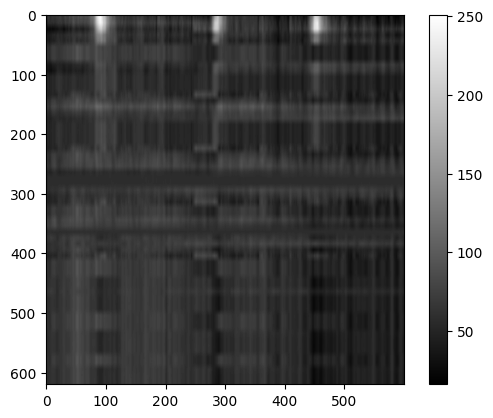

In [150]:
eeg_sample = eeg_dataset[2].clone()
eeg_sample = process_trim_eeg(eeg_sample)
print(eeg_sample.size())
print(eeg_sample)
eeg_sample = process_method_4(eeg_sample)
print(eeg_sample.size())
# Plot heatmap image
image = eeg_sample[0,:,:]
print(f"Size of one channel heatmap image: {image.size()}")
print(image)

# Plot the one-channel image
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.show()

2024-01-13 19:42:39,206 DEBUG MainThread matplotlib.colorbar locator: <matplotlib.ticker.AutoLocator object at 0x7f2f6c242920>


tensor([[[ 73.,  74.,  71.,  ...,  20.,  21.,  23.],
         [ 73.,  74.,  71.,  ...,  20.,  21.,  23.],
         [ 73.,  74.,  71.,  ...,  20.,  21.,  23.],
         ...,
         [198., 156.,  94.,  ..., 112.,  89.,  74.],
         [198., 156.,  94.,  ..., 112.,  89.,  74.],
         [198., 156.,  94.,  ..., 112.,  89.,  74.]],

        [[ 73.,  74.,  71.,  ...,  20.,  21.,  23.],
         [ 73.,  74.,  71.,  ...,  20.,  21.,  23.],
         [ 73.,  74.,  71.,  ...,  20.,  21.,  23.],
         ...,
         [198., 156.,  94.,  ..., 112.,  89.,  74.],
         [198., 156.,  94.,  ..., 112.,  89.,  74.],
         [198., 156.,  94.,  ..., 112.,  89.,  74.]],

        [[ 73.,  74.,  71.,  ...,  20.,  21.,  23.],
         [ 73.,  74.,  71.,  ...,  20.,  21.,  23.],
         [ 73.,  74.,  71.,  ...,  20.,  21.,  23.],
         ...,
         [198., 156.,  94.,  ..., 112.,  89.,  74.],
         [198., 156.,  94.,  ..., 112.,  89.,  74.],
         [198., 156.,  94.,  ..., 112.,  89.,  74.]]]

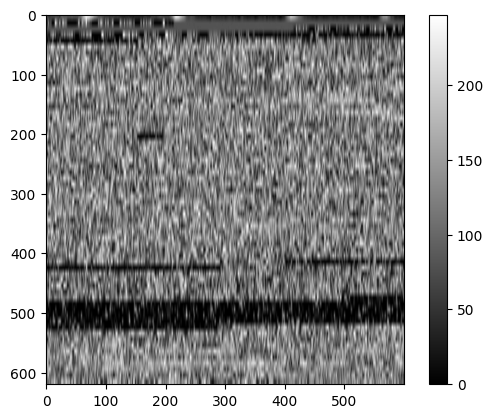

In [134]:

print(eeg_sample)


2024-01-13 19:05:46,606 DEBUG MainThread matplotlib.colorbar locator: <matplotlib.ticker.AutoLocator object at 0x7f2fa5a65f00>


Size of one channel heatmap image: torch.Size([620, 600])


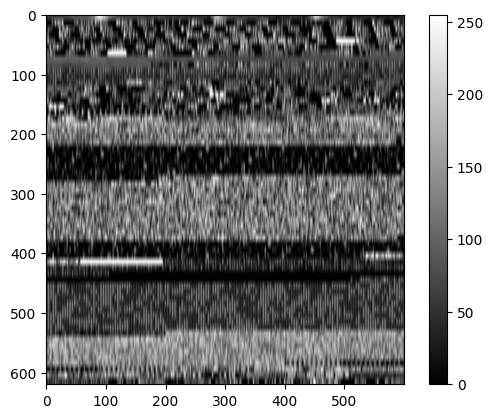